# Support Vector Machines (SVM) in Machine Learning
Support Vector Machines (SVM) is a powerful supervised learning algorithm used for both **classification** and **regression** problems.
It finds the optimal hyperplane that best separates different classes in a dataset.

## 1. Importing Required Libraries
We'll use `numpy`, `pandas`, `matplotlib`, and `sklearn` to build and visualize the SVM model.

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix


## 2. Generating a Sample Dataset
We'll create a synthetic dataset for binary classification using `numpy`.

In [2]:
# Generate synthetic data
np.random.seed(42)
X = np.random.randn(200, 2)  # 200 samples, 2 features
Y = (X[:, 0] * X[:, 1] > 0).astype(int)  # Class labels based on feature multiplication

# Convert to DataFrame
data = pd.DataFrame({'Feature1': X[:, 0], 'Feature2': X[:, 1], 'Label': Y})
data.head()

,Feature1,Feature2,Label
0,0.496714,-0.138264,0
1,0.647689,1.523030,1
2,-0.234153,-0.234137,1
3,1.579213,0.767435,1
4,-0.469474,0.542560,0


## 3. Visualizing the Dataset
Let's plot the dataset to see how the classes are distributed.

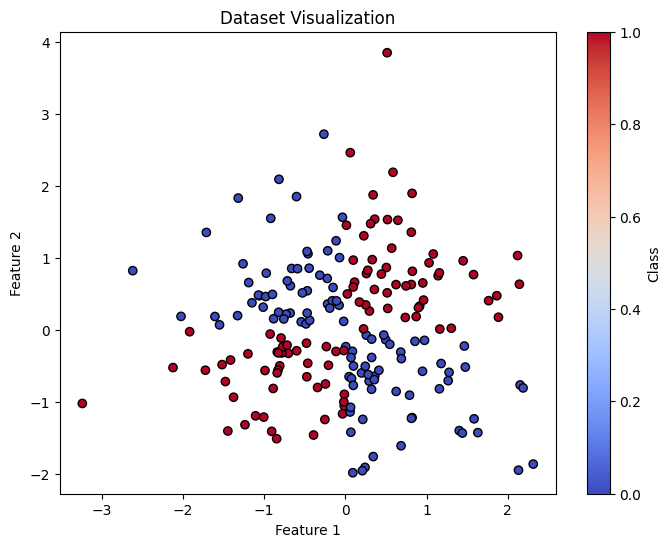

In [3]:
# Scatter plot of data
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm', edgecolors='k')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.title('Dataset Visualization')
plt.colorbar(label='Class')
plt.show()

## 4. Splitting Data into Training and Testing Sets

In [4]:
# Splitting dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((160, 2), (40, 2))

## 5. Training the SVM Model
We'll train an SVM model with a linear kernel.

In [5]:
# Training the SVM model
model = SVC(kernel='linear')  # Linear kernel
model.fit(X_train, Y_train)


SVC(kernel='linear')

## 6. Making Predictions and Evaluating the Model

In [6]:
# Predictions
Y_pred = model.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(Y_test, Y_pred)
conf_matrix = confusion_matrix(Y_test, Y_pred)
report = classification_report(Y_test, Y_pred)

print(f'Accuracy: {accuracy:.2f}')
print('\nConfusion Matrix:\n', conf_matrix)
print('\nClassification Report:\n', report)

Accuracy: 0.62

Confusion Matrix:
 [[17  2]
 [13  8]]

Classification Report:
               precision    recall  f1-score   support

           0       0.57      0.89      0.69        19
           1       0.80      0.38      0.52        21

    accuracy                           0.62        40
   macro avg       0.68      0.64      0.61        40
weighted avg       0.69      0.62      0.60        40



## 7. Visualizing the Decision Boundary
We'll plot the decision boundary of the SVM classifier.

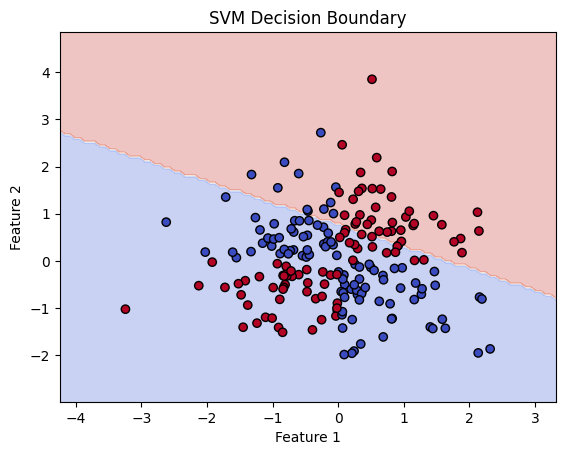

In [7]:
# Function to plot decision boundary
def plot_decision_boundary(model, X, Y):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100), np.linspace(y_min, y_max, 100))
    
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='coolwarm', edgecolors='k')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title('SVM Decision Boundary')
    plt.show()

# Plot decision boundary
plot_decision_boundary(model, X, Y)